In [2]:
%% Machine Learning Online Class - Exercise 4 Neural Network Learning

%  Instructions
%  ------------
% 
%  This file contains code that helps you get started on the
%  linear exercise. You will need to complete the following functions 
%  in this exericse:
%
%     sigmoidGradient.m
%     randInitializeWeights.m
%     nnCostFunction.m
%
%  For this exercise, you will not need to change any code in this file,
%  or any other files other than those mentioned above.
%

%% Initialization
clear ; close all; clc
graphics_toolkit ("gnuplot");

Loading and Visualizing Data ...


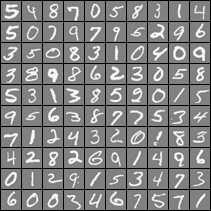

In [3]:
%% Setup the parameters you will use for this exercise
input_layer_size  = 400;  % 20x20 Input Images of Digits
hidden_layer_size = 25;   % 25 hidden units
num_labels = 10;          % 10 labels, from 1 to 10   
                          % (note that we have mapped "0" to label 10)

%% =========== Part 1: Loading and Visualizing Data =============
%  We start the exercise by first loading and visualizing the dataset. 
%  You will be working with a dataset that contains handwritten digits.
%

% Load Training Data
fprintf('Loading and Visualizing Data ...\n')

load('ex4data1.mat');
##size(X)
##X=X(1:100,:);
##y=y(1:100);
m = size(X, 1);

% Randomly select 100 data points to display
sel = randperm(size(X, 1));
sel = sel(1:100);

displayData(X(sel, :));

In [5]:
%% ================ Part 2: Loading Parameters ================
% In this part of the exercise, we load some pre-initialized 
% neural network parameters.

fprintf('\nLoading Saved Neural Network Parameters ...\n')

% Load the weights into variables Theta1 and Theta2
load('ex4weights.mat');

% Unroll parameters 
nn_params = [Theta1(:) ; Theta2(:)];


Loading Saved Neural Network Parameters ...


In [ ]:
[J _ tiempos] = nnCostFunction_nonVec(nn_params, input_layer_size, hidden_layer_size, ...
                   num_labels, X, y, lambda);

In [46]:
# Time taken to calculate cost function and gradients using unvectorized function
tiempos

tiempos = 104.60


In [43]:
%% ================ Part 3: Compute Cost (Feedforward) ================
%  To the neural network, you should first start by implementing the
%  feedforward part of the neural network that returns the cost only. You
%  should complete the code in nnCostFunction.m to return cost. After
%  implementing the feedforward to compute the cost, you can verify that
%  your implementation is correct by verifying that you get the same cost
%  as us for the fixed debugging parameters.
%
%  We suggest implementing the feedforward cost *without* regularization
%  first so that it will be easier for you to debug. Later, in part 4, you
%  will get to implement the regularized cost.
%
fprintf('\nFeedforward Using Neural Network ...\n')

% Weight regularization parameter (we set this to 0 here).
lambda = 0;

[J _ tiempos] = nnCostFunction(nn_params, input_layer_size, hidden_layer_size, ...
                   num_labels, X, y, lambda);

fprintf(['Cost at parameters (loaded from ex4weights): %f '...
         '\n(this value should be about 0.287629)\n'], J);


Feedforward Using Neural Network ...
Cost at parameters (loaded from ex4weights): 0.287629 
(this value should be about 0.287629)


In [44]:
# Time taken to calculate cost function and gradients using vectorized function
tiempos

tiempos = 0.1164


In [ ]:
# It can be seen that the vectorized version of the code, runs 1000 times faster,
# due to not having to loop over the 5000 examples

In [47]:
%% =============== Part 4: Implement Regularization ===============
%  Once your cost function implementation is correct, you should now
%  continue to implement the regularization with the cost.
%

fprintf('\nChecking Cost Function (w/ Regularization) ... \n')

% Weight regularization parameter (we set this to 1 here).
lambda = 1;

J = nnCostFunction(nn_params, input_layer_size, hidden_layer_size, ...
                   num_labels, X, y, lambda);

fprintf(['Cost at parameters (loaded from ex4weights): %f '...
         '\n(this value should be about 0.383770)\n'], J);


Checking Cost Function (w/ Regularization) ... 
Cost at parameters (loaded from ex4weights): 0.383770 
(this value should be about 0.383770)


In [48]:
%% ================ Part 5: Sigmoid Gradient  ================
%  Before you start implementing the neural network, you will first
%  implement the gradient for the sigmoid function. You should complete the
%  code in the sigmoidGradient.m file.
%

fprintf('\nEvaluating sigmoid gradient...\n')

g = sigmoidGradient([-1 -0.5 0 0.5 1]);
fprintf('Sigmoid gradient evaluated at [-1 -0.5 0 0.5 1]:\n  ');
fprintf('%f ', g);
fprintf('\n\n');


Evaluating sigmoid gradient...
Sigmoid gradient evaluated at [-1 -0.5 0 0.5 1]:
  0.196612 0.235004 0.250000 0.235004 0.196612 



In [49]:
%% ================ Part 6: Initializing Pameters ================
%  In this part of the exercise, you will be starting to implment a two
%  layer neural network that classifies digits. You will start by
%  implementing a function to initialize the weights of the neural network
%  (randInitializeWeights.m)

fprintf('\nInitializing Neural Network Parameters ...\n')

initial_Theta1 = randInitializeWeights(input_layer_size, hidden_layer_size);
initial_Theta2 = randInitializeWeights(hidden_layer_size, num_labels);

% Unroll parameters
initial_nn_params = [initial_Theta1(:) ; initial_Theta2(:)];


Initializing Neural Network Parameters ...


In [50]:
%% =============== Part 7: Implement Backpropagation ===============
%  Once your cost matches up with ours, you should proceed to implement the
%  backpropagation algorithm for the neural network. You should add to the
%  code you've written in nnCostFunction.m to return the partial
%  derivatives of the parameters.
%
fprintf('\nChecking Backpropagation... \n');

%  Check gradients by running checkNNGradients
checkNNGradients;


Checking Backpropagation... 
  -9.2783e-03  -9.2783e-03
   8.8991e-03   8.8991e-03
  -8.3601e-03  -8.3601e-03
   7.6281e-03   7.6281e-03
  -6.7480e-03  -6.7480e-03
  -3.0498e-06  -3.0498e-06
   1.4287e-05   1.4287e-05
  -2.5938e-05  -2.5938e-05
   3.6988e-05   3.6988e-05
  -4.6876e-05  -4.6876e-05
  -1.7506e-04  -1.7506e-04
   2.3315e-04   2.3315e-04
  -2.8747e-04  -2.8747e-04
   3.3532e-04   3.3532e-04
  -3.7622e-04  -3.7622e-04
  -9.6266e-05  -9.6266e-05
   1.1798e-04   1.1798e-04
  -1.3715e-04  -1.3715e-04
   1.5325e-04   1.5325e-04
  -1.6656e-04  -1.6656e-04
   3.1454e-01   3.1454e-01
   1.1106e-01   1.1106e-01
   9.7401e-02   9.7401e-02
   1.6409e-01   1.6409e-01
   5.7574e-02   5.7574e-02
   5.0458e-02   5.0458e-02
   1.6457e-01   1.6457e-01
   5.7787e-02   5.7787e-02
   5.0753e-02   5.0753e-02
   1.5834e-01   1.5834e-01
   5.5924e-02   5.5924e-02
   4.9162e-02   4.9162e-02
   1.5113e-01   1.5113e-01
   5.3697e-02   5.3697e-02
   4.7146e-02   4.7146e-02
   1.4957e-01   1.4957e-0

In [51]:
%% =============== Part 8: Implement Regularization ===============
%  Once your backpropagation implementation is correct, you should now
%  continue to implement the regularization with the cost and gradient.
%

fprintf('\nChecking Backpropagation (w/ Regularization) ... \n')

%  Check gradients by running checkNNGradients
lambda = 3;
checkNNGradients(lambda);


Checking Backpropagation (w/ Regularization) ... 
  -9.2783e-03  -9.2783e-03
   8.8991e-03   8.8991e-03
  -8.3601e-03  -8.3601e-03
   7.6281e-03   7.6281e-03
  -6.7480e-03  -6.7480e-03
  -1.6768e-02  -1.6768e-02
   3.9433e-02   3.9433e-02
   5.9336e-02   5.9336e-02
   2.4764e-02   2.4764e-02
  -3.2688e-02  -3.2688e-02
  -6.0174e-02  -6.0174e-02
  -3.1961e-02  -3.1961e-02
   2.4923e-02   2.4923e-02
   5.9772e-02   5.9772e-02
   3.8641e-02   3.8641e-02
  -1.7370e-02  -1.7370e-02
  -5.7566e-02  -5.7566e-02
  -4.5196e-02  -4.5196e-02
   9.1459e-03   9.1459e-03
   5.4610e-02   5.4610e-02
   3.1454e-01   3.1454e-01
   1.1106e-01   1.1106e-01
   9.7401e-02   9.7401e-02
   1.1868e-01   1.1868e-01
   3.8193e-05   3.8193e-05
   3.3693e-02   3.3693e-02
   2.0399e-01   2.0399e-01
   1.1715e-01   1.1715e-01
   7.5480e-02   7.5480e-02
   1.2570e-01   1.2570e-01
  -4.0759e-03  -4.0759e-03
   1.6968e-02   1.6968e-02
   1.7634e-01   1.7634e-01
   1.1313e-01   1.1313e-01
   8.6163e-02   8.6163e-02
   1

In [52]:
% Also output the costFunction debugging values
debug_J  = nnCostFunction(nn_params, input_layer_size, ...
                          hidden_layer_size, num_labels, X, y, lambda);

fprintf(['\n\nCost at (fixed) debugging parameters (w/ lambda = %f): %f ' ...
         '\n(for lambda = 3, this value should be about 0.576051)\n\n'], lambda, debug_J);



Cost at (fixed) debugging parameters (w/ lambda = 3.000000): 0.576051 
(for lambda = 3, this value should be about 0.576051)

